In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
# from keras import layers


from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image

import tensorflow.keras.backend as K


from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random



In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) == 0:
    print("Not enough GPU hardware devices available")
else:
    config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


2023-06-02 20:42:55.438668: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-06-02 20:42:55.473813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 20:42:55.474141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 with Max-Q Design computeCapability: 7.5
coreClock: 1.23GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2023-06-02 20:42:55.474321: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-06-02 20:42:55.475596: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-06-02 20:42:55.476858: I tensorflow/st

In [3]:
# tf.debugging.set_log_device_placement(True)       # Will print the log information of every execution of tensorflow, mainly about 

In [4]:
#Size of our input images
# SIZE = 128        # It was this value at the beginning, but the image display was poor. 
SIZE = 224
# SIZE = 228          # It was 224, but in order for the current autoencoder model configuration work adequately, we changed it 228

# Setting the training and testing datasets 

ImageDataGenerator.flow_from_directory: Takes the path to a directory and generates batches of augmented data.

In [5]:
batch_size = 15
datagen = ImageDataGenerator(rescale=1./255) # Typically used for data augmentation. Here it is only rescaling the image pixels value to range 0 to 1 in decimals

train_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",     # For home laptop
    # "../../../BottleStoodUp_atNight/Positive/",           # For work laptop
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    shuffle = False,
    class_mode='input'          # Class used for working with Autoencoders
    
    )

Found 179 images belonging to 1 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive_val/",     # For home laptop
    # "../../../BottleStoodUp_atNight/Positive_val/",           # For work lpatop   
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    shuffle = False,
    class_mode='input'
    )


Found 30 images belonging to 1 classes.


In [7]:
anomaly_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Anomalies2.0/",         # For home laptop
    # "../../../BottleStoodUp_atNight/Anomalies2.0/",           # For work lpatpo
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    shuffle = False,
    class_mode='input'
    )


Found 6 images belonging to 1 classes.


In [8]:
test_set_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Evaluation/",       # For home laptop
    # "../../../BottleStoodUp_atNight/Evaluation/",             # For work laptop  
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    shuffle = False,
    class_mode='input'
    )


Found 30 images belonging to 2 classes.


# Configuring the Autoencoder netwrok

In [9]:

# batch_size = 16
latent_dim = 32  # Number of latent dimension parameters

input_img = Input(shape=(SIZE, SIZE, 3))
x = Conv2D(128, (3, 3), activation='relu', padding='same') (input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D( (2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D( (2, 2), padding='same')(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D( (2, 2), padding='same')(x)

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

shape_before_flattening = K.int_shape(x)
print(shape_before_flattening)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

Z = Dense(latent_dim)(x)
print(K.int_shape(Z))

encoder = Model(input_img,Z)
encoder.summary()

2023-06-02 20:42:56.091129: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-06-02 20:42:56.121461: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2599990000 Hz
2023-06-02 20:42:56.121978: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feecc001500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-06-02 20:42:56.121993: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-06-02 20:42:56.189611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 20:42:56.190182: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x54ae280 initialized for platform CUDA (this does not guarantee that XLA will

(None, 7, 7, 1)
(None, 32)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None

In [10]:
# decoder takes the latent distribution sample as input
decoder_input = Input(K.int_shape(Z)[1:])
x = Dense(14*14*4, activation='relu', name="intermediate_decoder", input_shape=(latent_dim,))(decoder_input)
# Expand to 784 total pixels
x = Dense(784, activation='sigmoid', name="original_decoder")(x)
x = Reshape((14,14,4),input_shape=(784,))(x)

x = Conv2DTranspose(3, (3, 3), padding='same')(x)
x = UpSampling2D( (2, 2))(x)

x = Conv2DTranspose(3, (3, 3), padding='same')(x)
x = UpSampling2D( (2, 2))(x)

x = Conv2DTranspose(3, (3, 3), padding='same')(x)
x = UpSampling2D( (2, 2))(x)

x = Conv2DTranspose(3, (3, 3), padding='same')(x)
x = UpSampling2D( (2, 2))(x)

# decoder model statement
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(Z)

decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
intermediate_decoder (Dense) (None, 784)               25872     
_________________________________________________________________
original_decoder (Dense)     (None, 784)               615440    
_________________________________________________________________
reshape (Reshape)            (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 3)         111       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 3)         84  

In [11]:
# VAE model statement
ae = Model(input_img,z_decoded)
ae.compile(optimizer='adam', loss='mse')

ae.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0   

In [12]:
model_version = 'NewAutoencoderModel11'
print(model_version)

NewAutoencoderModel11


Loading the model that was previously saved


In [13]:
model = keras.models.load_model('../models/NewAutoencoderModel11')
print(type(model))

<class 'tensorflow.python.keras.engine.training.Model'>


## Perform an Autoencoder reconstruction in one image

Get all batches generated by the datagen and pick a batch for prediction

In [14]:
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
# while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
while img_num < len(train_generator):        #I think this should be the correct while clause
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1
    
print("number of batches are: ", img_num)


number of batches are:  12


In [15]:
print(len(data_batch))

12


Predict on the first batch of images. Do also notice that the prediction is being carried out over the images we used for training.

In [16]:
print(data_batch[0].shape)
predicted = model.predict(data_batch[0])  
print(predicted.shape)

(15, 224, 224, 3)


2023-06-02 20:42:59.348396: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-06-02 20:42:59.561722: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


(15, 224, 224, 3)


The above is 15 length because it corresponds to the 15 predicted images of a batch. Recall that the predictions are reconstructions of the input images, since we are working with the autoencoder network.

In [17]:
single_img = data_batch[0][0]

In [18]:
print(single_img.shape)

(224, 224, 3)


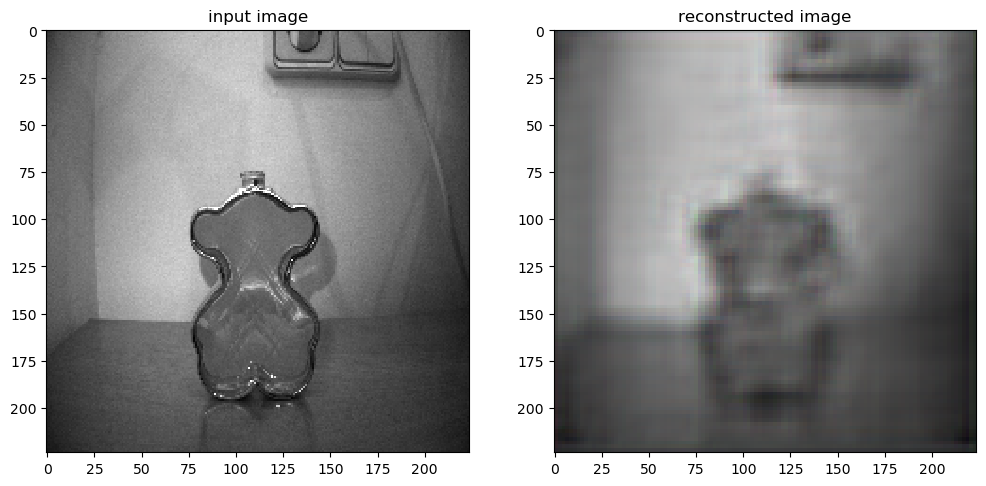

In [19]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0]-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("input image")
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.title("reconstructed image")
plt.imshow(predicted[image_number])
plt.show()

# Computing the reconstruction image without using the "evaluate_generator()" function

Using the .predict() function

In [20]:
def calc_prediction(batch_images):   
    recon_list=[]
    for im in range(0, batch_images.shape[0]):
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        reconstruction = model.predict([[img]])
        recon_list.append(reconstruction)   
    return recon_list

In [21]:
aux = []
for i in range(len(train_generator)):        #I think this should be the correct while clause
    data = train_generator.next()
    aux.append(calc_prediction(data[0]))
    
print("The list of rec. error contains ", len(aux), "batches of rec. errors")

The list of rec. error contains  12 batches of rec. errors


In [22]:
total_aux_list = [item for sublist in aux for item in sublist]
print(len(total_aux_list))
print(total_aux_list[0].shape)
img1 = total_aux_list[0][0]
print(img1.shape)

179
(1, 224, 224, 3)
(224, 224, 3)


Using the .predict_generator() function

In [23]:
rec_list_generator = model.predict_generator(train_generator)
print(len(rec_list_generator))
print(rec_list_generator[0].shape)
img2 = rec_list_generator[0]
print(img2.shape)

Instructions for updating:
Please use Model.predict, which supports generators.
179
(224, 224, 3)
(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


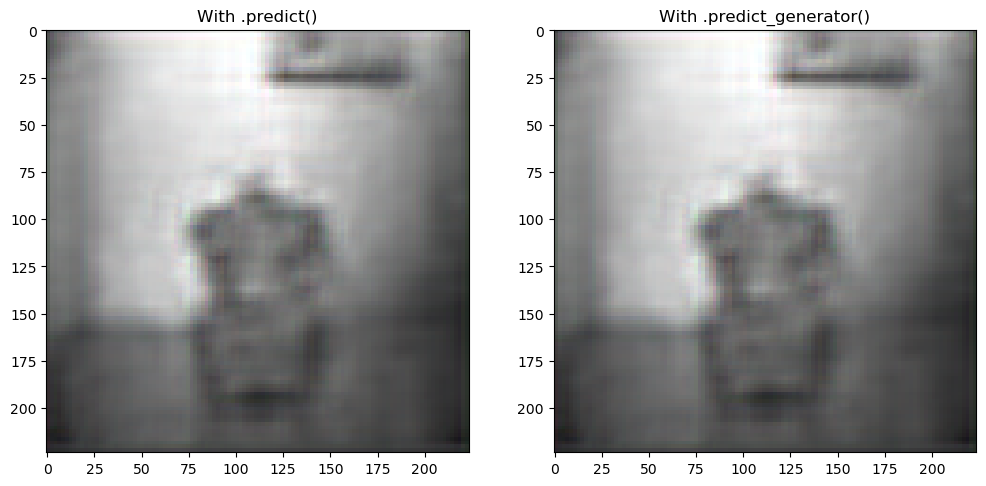

In [24]:
#Sanity check, view few images and corresponding reconstructions

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("With .predict()")
plt.imshow(img1)
plt.subplot(122)
plt.title("With .predict_generator()")
plt.imshow(img2)
plt.show()

In [25]:
img1 == img2

array([[[False, False, False],
        [False, False, False],
        [False,  True,  True],
        ...,
        [ True, False,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False,  True,  True],
        ...,
        [ True, False,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False,  True,  True],
        [False,  True,  True],
        [False,  True, False],
        ...,
        [ True,  True,  True],
        [ True,  True, False],
        [ True,  True, False]],

       ...,

       [[ True, False,  True],
        [ True, False,  True],
        [ True, False,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[ True, False,  True],
        [ True, False,  True],
        [False,  True,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

As seen above, the reconstructed images are not completely the same between them. Meaning that the we must be aware of the usage of functions .predict() and .predict_genreator()

# Computing the reconstruction image in other fashion

Using the .predict() function

In [26]:
def calc_prediction(batch_images):   
    recon_list=[]
    for im in range(0, batch_images.shape[0]):
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        reconstruction = model.predict([[img]])
        recon_list.append(reconstruction)   
    return recon_list

In [27]:
aux = []
for i in range(len(train_generator)):        #I think this should be the correct while clause
    data = train_generator.next()
    aux.append(calc_prediction(data[0]))
    
print("The list of rec. error contains ", len(aux), "batches of rec. errors")

The list of rec. error contains  12 batches of rec. errors


In [28]:
total_aux_list = [item for sublist in aux for item in sublist]
print(len(total_aux_list))
print(total_aux_list[0].shape)
img1 = total_aux_list[0][0]
print(img1.shape)

179
(1, 224, 224, 3)
(224, 224, 3)


Using the .predict() function. As per the Tensorflow warning that indicated: "Please use Model.predict, which supports generators."

In [29]:
rec_list = model.predict(train_generator)
print(len(rec_list))
print(rec_list[0].shape)
img2 = rec_list[0]
print(img2.shape)

179
(224, 224, 3)
(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


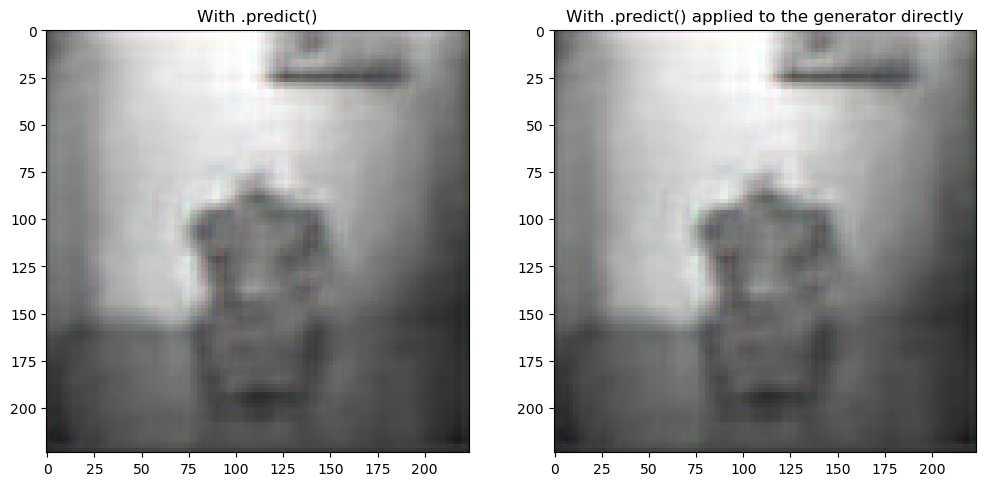

In [30]:
#Sanity check, view few images and corresponding reconstructions

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("With .predict()")
plt.imshow(img1)
plt.subplot(122)
plt.title("With .predict() applied to the generator directly")
plt.imshow(img2)
plt.show()

In [31]:
img1 == img2

array([[[False, False, False],
        [False, False, False],
        [False,  True,  True],
        ...,
        [ True, False,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False,  True,  True],
        ...,
        [ True, False,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False,  True,  True],
        [False,  True,  True],
        [False,  True, False],
        ...,
        [ True,  True,  True],
        [ True,  True, False],
        [ True,  True, False]],

       ...,

       [[ True, False,  True],
        [ True, False,  True],
        [ True, False,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[ True, False,  True],
        [ True, False,  True],
        [False,  True,  True],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

As seen above, even using only .predict() function outputs two different results. It was tested over images by thmeselves and also over the generator entirely. The reason is not completely kwnown, however, it could be due to:
1. Preprocessing: When using model.predict on individual images, it's essential to ensure that the preprocessing applied to the images is consistent with the preprocessing used during the training of the model. This includes aspects such as scaling, normalization, resizing, or any other transformations. If the preprocessing is not applied correctly or consistently, it can lead to differences in the predictions.

2. Batching: When using model.predict on individual images, the model typically processes each image independently. On the other hand, when using a data generator with model.predict_generator, the model processes images in batches. The model's predictions might differ depending on whether it operates on individual images or on a batch of images due to batch normalization or other operations that depend on the batch dimension.

## Compute averages and compare

The average of the results of .predict applied over images individually

In [33]:
average_recon_error1 = np.mean(np.array(total_aux_list))  
stdev_recon_error1 = np.std(np.array(total_aux_list)) 
min_prob = np.min(total_aux_list)
max_prob = np.max(total_aux_list)
print("THIS IS FOR .PREDICT IN IMAGES INDIVIDUALLY\n")
print("The average of the errors list is: ", average_recon_error1)
print("The standard deviation of the errors list is: ", stdev_recon_error1)
print("The min value of the errors list is: ", min_prob)
print("The max value of the errors list is: ", max_prob)

THIS IS FOR .PREDICT IN IMAGES INDIVIDUALLY

The average of the errors list is:  0.4571771
The standard deviation of the errors list is:  0.18724139
The min value of the errors list is:  0.040674247
The max value of the errors list is:  1.0751947


The average of the results of .predict applied over the entire generator

In [34]:
average_recon_error2 = np.mean(np.array(rec_list))  
stdev_recon_error2 = np.std(np.array(rec_list)) 
min_prob = np.min(rec_list)
max_prob = np.max(rec_list)
print("THIS IS FOR .PREDICT IN IMAGES FROM THE ENTIRE GENERATOR\n")
print("The average of the errors list is: ", average_recon_error2)
print("The standard deviation of the errors list is: ", stdev_recon_error2)
print("The min value of the errors list is: ", min_prob)
print("The max value of the errors list is: ", max_prob)

THIS IS FOR .PREDICT IN IMAGES FROM THE ENTIRE GENERATOR

The average of the errors list is:  0.4571771
The standard deviation of the errors list is:  0.18724139
The min value of the errors list is:  0.04067424
The max value of the errors list is:  1.0751947


## Compute averages and compare 2

The average of the results of .predict and .predict_generator

In [35]:
average_recon_error1 = np.mean(np.array(total_aux_list))  
stdev_recon_error1 = np.std(np.array(total_aux_list)) 
min_prob = np.min(total_aux_list)
max_prob = np.max(total_aux_list)
print("THIS IS FOR .PREDICT IN IMAGES INDIVIDUALLY\n")
print("The average of the errors list is: ", average_recon_error1)
print("The standard deviation of the errors list is: ", stdev_recon_error1)
print("The min value of the errors list is: ", min_prob)
print("The max value of the errors list is: ", max_prob)

THIS IS FOR .PREDICT IN IMAGES INDIVIDUALLY

The average of the errors list is:  0.4571771
The standard deviation of the errors list is:  0.18724139
The min value of the errors list is:  0.040674247
The max value of the errors list is:  1.0751947


The average of the results of .predict applied over the entire generator

In [36]:
average_recon_error2 = np.mean(np.array(rec_list_generator))  
stdev_recon_error2 = np.std(np.array(rec_list_generator)) 
min_prob = np.min(rec_list_generator)
max_prob = np.max(rec_list_generator)
print("THIS IS FOR .PREDICT IN IMAGES FROM THE ENTIRE GENERATOR\n")
print("The average of the errors list is: ", average_recon_error2)
print("The standard deviation of the errors list is: ", stdev_recon_error2)
print("The min value of the errors list is: ", min_prob)
print("The max value of the errors list is: ", max_prob)

THIS IS FOR .PREDICT IN IMAGES FROM THE ENTIRE GENERATOR

The average of the errors list is:  0.4571771
The standard deviation of the errors list is:  0.18724139
The min value of the errors list is:  0.04067424
The max value of the errors list is:  1.0751947


## Conclusions

See the results above, the average and std deviations of both results (.prdeict over images individually and over the entire generator) are the same! Menaing that the usage of .predict over images individually and over the entire generator is indistincit